# ACME-HappinessSurvey2020


## Problem Statement

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

### Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.

### Success Metrics:

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

### Bonus(es):

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach, show us what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

## Data Description:

Y  = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

### This is a binary classificaton problem to predict wheather a customer would be happy or not based on feedbacks on services received.
In this project a Classification Model will be used to categorize the target attribute

In [1]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the Models and Methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.model_selection import GridSearchCV

# Settings
from sklearn import set_config
set_config(print_changed_only=False)

#### Get the data, explore it and process it for prediction Models

In [2]:
# Read in Dataset

Dataset = pd.read_csv('C:\\Users\\Public\\ACME-HappinessSurvey2020.csv')

print(Dataset.shape)
Dataset.head(5)

(126, 7)


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
Dataset.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,0.55,4.33,2.53,3.31,3.75,3.65,4.25
std,0.50,0.80,1.11,1.02,0.88,1.15,0.81
min,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,0.00,4.00,2.00,3.00,3.00,3.00,4.00
50%,1.00,5.00,3.00,3.00,4.00,4.00,4.00
75%,1.00,5.00,3.00,4.00,4.00,4.00,5.00
max,1.00,5.00,5.00,5.00,5.00,5.00,5.00


<AxesSubplot:ylabel='Y'>

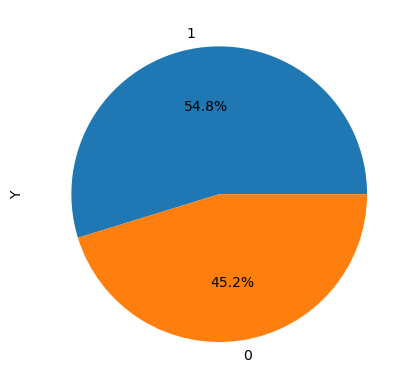

In [4]:
Dataset['Y'].value_counts().plot.pie(autopct='%1.1f%%')

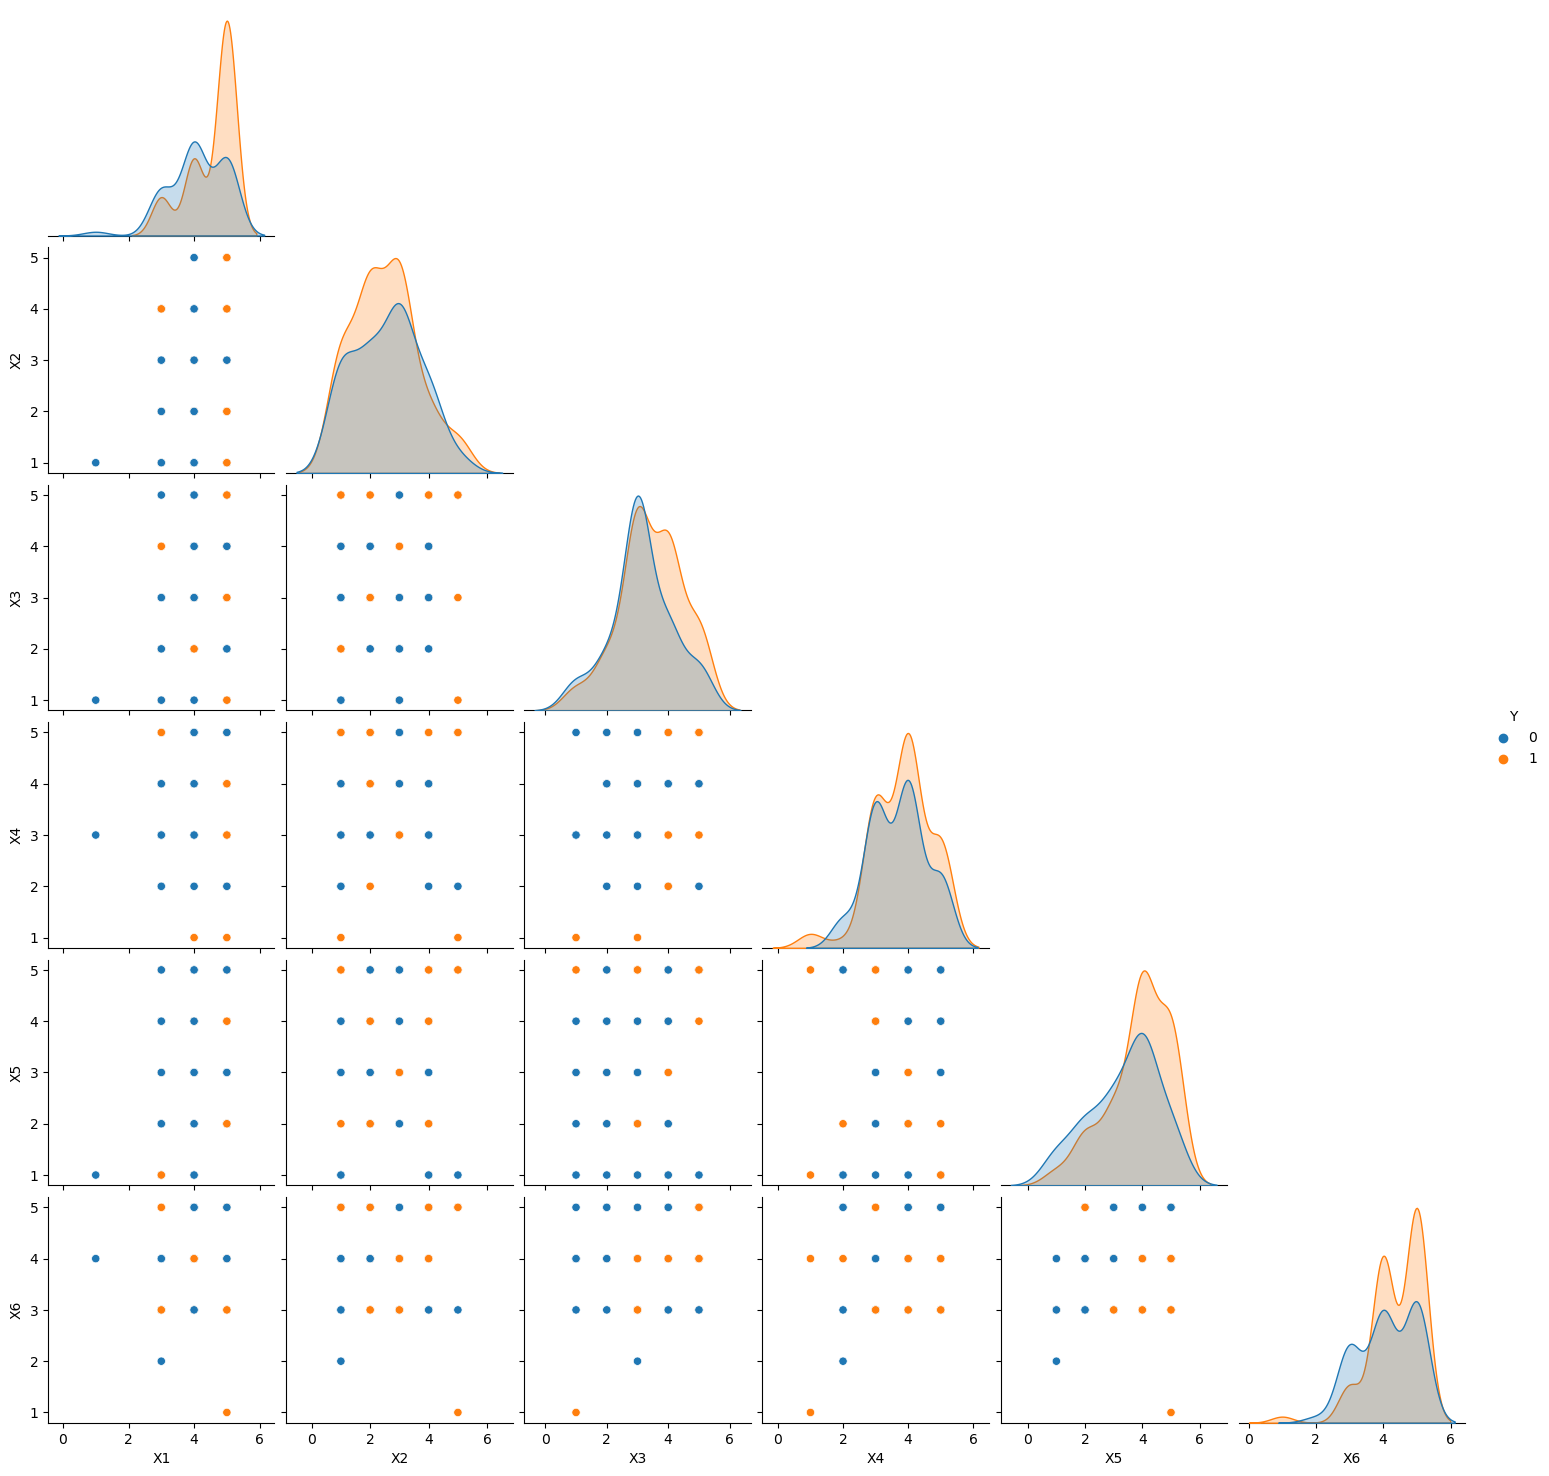

In [5]:
sns.pairplot (Dataset, hue='Y', corner =True);

In [6]:
# Correlation (For selecting the most correlated feature to the target)

Dataset.corr()

,Y,X1,X2,X3,X4,X5,X6
Y,1.00,0.28,-0.02,0.15,0.06,0.22,0.17
X1,0.28,1.00,0.06,0.28,0.09,0.43,0.41
X2,-0.02,0.06,1.00,0.18,0.11,0.04,-0.06
X3,0.15,0.28,0.18,1.00,0.30,0.36,0.20
X4,0.06,0.09,0.11,0.30,1.00,0.29,0.22
X5,0.22,0.43,0.04,0.36,0.29,1.00,0.32
X6,0.17,0.41,-0.06,0.20,0.22,0.32,1.00


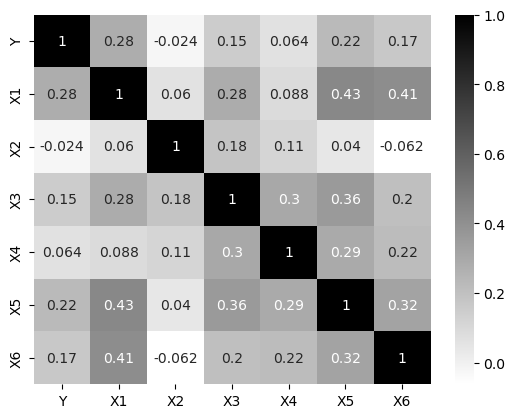

In [7]:
cor = Dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.binary)
plt.show()

In [8]:
# Check how correlated each feature is to the target 

print(cor['Y'].sort_values(ascending=False))

Y     1.00
X1    0.28
X5    0.22
X6    0.17
X3    0.15
X4    0.06
X2   -0.02
Name: Y, dtype: float64


## Observations from exploring the dataset

It shows that the ratings from customers for 'contents of my order was as I expected' (X2) and  'I paid a good price for my order' (X4) are the least correlated features to determine wheather the customers are happy or not. While 'my order was delivered on time' (X1) and ' I am satisfied with my courier' (X5) had the strongest correlation to the target attribute 'Y'

From our pairplot it shows that 'I ordered everything I wanted to order' (X3) didn't have direct impact on the happiness of the customers.

Also, the heatmap shows the X1, X5 and X6 are strongly correlated to each other.

In [9]:
# Define Targets

y = Dataset ['Y']
y

0      0
1      0
2      1
3      0
4      0
      ..
121    1
122    1
123    1
124    0
125    0
Name: Y, Length: 126, dtype: int64

In [10]:
# Define Features

X = Dataset.drop('Y', axis=1)
X

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5
...,...,...,...,...,...,...
121,5,2,3,4,4,3
122,5,2,3,4,2,5
123,5,3,3,4,4,5
124,4,3,3,4,4,5


In [21]:
# using mutual_info_classif for classification problem MI

from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y, discrete_features=np.arange(1,6,1), 
                                n_neighbors=3, copy=True, random_state=42)
mi_scores = pd.Series(mi_scores, name= 'MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores

X1   0.06
X6   0.04
X5   0.03
X4   0.02
X3   0.02
X2   0.01
Name: MI Scores, dtype: float64

### Observation: 
X2, X3, and X4 have the lowest dependecies to Y, also their correlation to Y are also low.
Features to drop would be X2 and X4. While X3 would still be remain as it has a higher correlation relatively.
This is because they were the least important features for optimizing the model. Hence they would be dropped. 

In [22]:
# drop X2 and X4

X = X.drop(['X2', 'X4'], axis=1)
X

,X1,X3,X5,X6
0,3,3,2,4
1,3,3,4,3
2,5,3,3,5
3,5,3,3,5
4,5,3,3,5
...,...,...,...,...
121,5,3,4,3
122,5,3,2,5
123,5,3,4,5
124,4,3,4,5


### Scale the Dataset
The dataset would be scaled for two reasons; to reduce it magnitude and prediction models run better with smaller numbers between 0 and 1

In [23]:
scalar = StandardScaler()
Scaled_data = scalar.fit_transform(X)
Scaled_data

array([[-1.67332005, -0.30364219, -1.44416589, -0.31506076],
       [-1.67332005, -0.30364219,  0.30549663, -1.55561249],
       [ 0.83666003, -0.30364219, -0.56933463,  0.92549097],
       [ 0.83666003, -0.30364219, -0.56933463,  0.92549097],
       [ 0.83666003, -0.30364219, -0.56933463,  0.92549097],
       [ 0.83666003, -0.30364219,  1.18032789,  0.92549097],
       [-1.67332005, -1.28464005, -2.31899715, -1.55561249],
       [ 0.83666003,  0.67735566,  0.30549663,  0.92549097],
       [-0.41833001,  0.67735566,  0.30549663, -0.31506076],
       [-0.41833001,  0.67735566,  1.18032789,  0.92549097],
       [-1.67332005, -0.30364219, -1.44416589, -1.55561249],
       [-0.41833001, -0.30364219,  0.30549663, -0.31506076],
       [ 0.83666003,  0.67735566,  1.18032789,  0.92549097],
       [-0.41833001,  0.67735566,  0.30549663, -1.55561249],
       [-0.41833001, -0.30364219,  0.30549663, -1.55561249],
       [-1.67332005,  0.67735566,  0.30549663, -0.31506076],
       [ 0.83666003,  0.

### Split Dataset into Training and Test/Validation Set (80/20)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Selection:

Here, six classifiers that work well on structured data for binary classification would be used. This will help us understand which model(s) work better without any parameter tuning.

Afterwards, the best performing models would be selected and their parameters tuned for a better performance

In [25]:
DTC = DecisionTreeClassifier()
RDF = RandomForestClassifier()
XGB = XGBClassifier()

DTC.fit(X_train, y_train)
RDF.fit(X_train, y_train)
XGB.fit(X_train, y_train)

pred_DTC = DTC.predict(X_test)
pred_RDF = RDF.predict(X_test)
pred_XGB = XGB.predict(X_test)

print('Model Accuracy for DecisionTreeClassifier :', accuracy_score(y_test, pred_DTC),'\n', classification_report(y_test, pred_DTC),
      '\n', 'Confusion Matrix :', '\n', confusion_matrix (y_test, pred_DTC))
print('Model Accuracy for RandomForestClassifier :', accuracy_score(y_test, pred_RDF),'\n', classification_report(y_test, pred_RDF),
      '\n', 'Confusion Matrix :', '\n', confusion_matrix (y_test, pred_RDF))
print('Model Accuracy for XGBClassifier :', accuracy_score(y_test, pred_XGB),'\n', classification_report(y_test, pred_XGB),
      '\n', 'Confusion Matrix :', '\n', confusion_matrix (y_test, pred_XGB))

Model Accuracy for DecisionTreeClassifier : 0.6538461538461539 
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.57      0.73      0.64        11

    accuracy                           0.65        26
   macro avg       0.66      0.66      0.65        26
weighted avg       0.67      0.65      0.66        26
 
 Confusion Matrix : 
 [[9 6]
 [3 8]]
Model Accuracy for RandomForestClassifier : 0.6538461538461539 
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.57      0.73      0.64        11

    accuracy                           0.65        26
   macro avg       0.66      0.66      0.65        26
weighted avg       0.67      0.65      0.66        26
 
 Confusion Matrix : 
 [[9 6]
 [3 8]]
Model Accuracy for XGBClassifier : 0.6923076923076923 
               precision    recall  f1-score   support

           0       0.82      

### Hyperparameter turning:

The best three models would be selected and optimized using the GridsearchCV to determine the best parameters to use for a particular model. The optimal parameter and important features would be apply to the model afterwards.
Also, we can select the best parameter based on processing times.

#### Models to optimize are:
1. DecisionTreeClassifier
2. XGBClassifier
3. RandomForestClassifier

### Hyperparameter turning DecisionTreeClassifier

In [26]:
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
     
grid_search = GridSearchCV(DTC, param_grid= parameters, cv=5 )

grid_search = grid_search.fit(X_train, y_train)

In [27]:
accuracy_DTC = grid_search.best_score_
accuracy_DTC

0.72

In [28]:
# Best parameters

grid_search.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto'}

In [31]:
# Using the best parameters to optimize the model

DTC_2 = DecisionTreeClassifier(ccp_alpha= 0.01, criterion= 'gini',max_depth= 5, max_features= 'auto')

DTC_2.fit(X_train, y_train)

pred_DTC_2 = DTC_2.predict(X_test)

print('Model Accuracy for RandomForestClassifier :', accuracy_score(y_test, pred_DTC_2),'\n', 
      classification_report(y_test, pred_DTC_2), '\n', 'Confusion Matrix :', '\n', confusion_matrix (y_test, pred_DTC_2))

Model Accuracy for RandomForestClassifier : 0.46153846153846156 
               precision    recall  f1-score   support

           0       0.67      0.13      0.22        15
           1       0.43      0.91      0.59        11

    accuracy                           0.46        26
   macro avg       0.55      0.52      0.41        26
weighted avg       0.57      0.46      0.38        26
 
 Confusion Matrix : 
 [[ 2 13]
 [ 1 10]]


### Hyperparameter turning RandonForestClassifier


In [46]:
parameters2 = [{'max_features': np.arange(1,6,1) , 'n_estimators' : np.arange(10,110,10)}]

grid_search2 = GridSearchCV(RDF, param_grid= parameters2, cv= 5)

grid_search2 = grid_search2.fit(X_train, y_train)

In [50]:
accuracy_RDF = grid_search2.best_score_
accuracy_RDF

0.6699999999999999

In [48]:
# Best parameters

grid_search2.best_params_

{'max_features': 2, 'n_estimators': 80}

In [49]:
# Using the best parameters to optimize the model

RDF_2 = RandomForestClassifier(max_features= 2, n_estimators=80)

RDF_2.fit(X_train, y_train)

pred_RDF_2 = RDF_2.predict(X_test)

print('Model Accuracy for RandomForestClassifier :', accuracy_score(y_test, pred_RDF_2),'\n', 
      classification_report(y_test, pred_RDF_2), '\n', 'Confusion Matrix :', '\n', confusion_matrix (y_test, pred_RDF_2))

Model Accuracy for RandomForestClassifier : 0.6538461538461539 
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.57      0.73      0.64        11

    accuracy                           0.65        26
   macro avg       0.66      0.66      0.65        26
weighted avg       0.67      0.65      0.66        26
 
 Confusion Matrix : 
 [[9 6]
 [3 8]]


### Hyperparameter turning XGBClassifier

In [52]:
parameters3 = [{"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
              }]

grid_search3 = GridSearchCV(XGB, param_grid= parameters3, cv= 5)

grid_search3 = grid_search3.fit(X_train, y_train)

In [53]:
accuracy_XGB = grid_search3.best_score_
accuracy_XGB

0.6699999999999999

In [54]:
grid_search3.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.15,
 'max_depth': 6,
 'min_child_weight': 1}